## 신경망 학습

In [1]:
import numpy as np

### 데이터 학습
#### 신경망 학습
>학습이란 = 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

### 손실함수

##### 1. 평균 제곱 오차
$E=\frac{1}{2}\sum_{k}^{} {(y_k-t_k)^2}\\y_k= 신경망의 출력, t_k= 정답 레이블, k= 데이터의 차원수$

In [2]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [3]:
t=[0,0,1,0,0,0,0,0,0,0]                         #정답 레이블 '2'
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]   #정답이 '2'라고 추정함 (0.6)
print(mean_squared_error(np.array(y),np.array(t)))
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t))) #정답이 '7'이라고 추정함(0.6)

0.09750000000000003
0.5975


##### 2. 교차 엔트로피 오차
$E=-\sum_{k}^{} {t_klog_e y_k}\\y_k= 신경망의 출력, t_k= 정답 레이블, k= 데이터의 차원수$

In [4]:
def cross_entropy_error(y,t):
    delta=1e-7    #log0을 방지하기 위해서
    return -np.sum(t*np.log(y+delta))

In [5]:
t=[0,0,1,0,0,0,0,0,0,0]                         #정답 레이블 '2'
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))
y=y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


#### 손글씨 숫자 인식

In [6]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test)=load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
np.random.choice(60000,10)

array([38138, 11449, 48814, 55271,  7759,  8716, 59895, 23187, 43753,
        8856])

- 정답 레이블이 원-핫 인코딩인 경우

In [8]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

- 정답 레이블이 원-핫 인코딩이 아닌 경우

In [9]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y[np.arange(batch_size),t]))/batch_size

#### 왜 손실함수를 설정하는가?
신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다

### 수치 미분

미분의 정의를 이용한 식에는 2가지 문제점이 있다
1. h를 가급적 작은 값을 대입해도 반올림 오차 문제를 일으켜 0.0으로 컴퓨터가 계산하는데 문제가 생긴다
2. 함수 f으 차분 x+h와 x사이의 함수 f의 차분을 계산하지만, h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계

개전점을 적용한 수치 미분

In [10]:
def numerical_diff(f,x):
    h=1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

간단한 함수를 미분해보자
$$y=0.01x^2+0.1x$$

In [11]:
def function_1(x):
    return 0.01*x**2+0.1*x

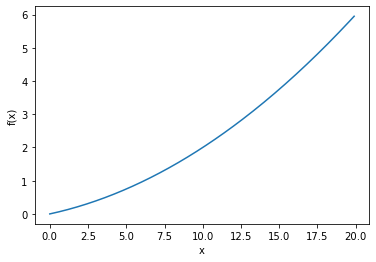

In [12]:
import matplotlib.pylab as plt

x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [13]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


### 편미분

$$f(x_0,x_1)=x_0^2+x_1^2$$

In [14]:
def function_2(x):
    return x[0]**2+x[1]**2

예시1. $x_0 =3, x_1=4$ 일때, $x_0$에 대한 편미분을 구하라

In [15]:
def function_tmp1(x0):
    return x0*x0+4.0**2
numerical_diff(function_tmp1,3.0)

6.00000000000378

예시2. $x_0 =3, x_1=4$ 일때, $x_1$에 대한 편미분을 구하라

In [16]:
def function_tmp2(x1):
    return 3.0**2+x1*x1
numerical_diff(function_tmp1,4.0)

7.999999999999119

### 기울기

$x_0$ 와 $x_1$의 편미분을 동시에 계산해서 벡터로 정리한 것을 기울기

In [17]:
def numerical_gradient(f,x):
    h= 1e-4
    grad=np.zeros_like(x)  #x와 같은 형상의 배열을 생성
    for idx in range(x.size):
        tmp_val=x[idx]
        #f(x+h) 계산
        x[idx]= tmp_val+h
        fxh1=f(x)
        #f(x-h) 계산
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    return grad

In [18]:
print(numerical_gradient(function_2,np.array([3.0,4.0]))) #(3,4)에서의 기울기
print(numerical_gradient(function_2,np.array([0,4.0])))   #(0,4)에서의 기울기
print(numerical_gradient(function_2,np.array([3.0,0])))   #(3,0)에서의 기울기

[6. 8.]
[0. 8.]
[6. 0.]


#### 경사하강법
기계학습은 대부분 학습단계에서 최적의 매개변수를 찾아낸다. 신경망 역시 최적의 매개변수를 학습 시에 찾아야한다. 여기서 최적이란, 손실 함수가 최솟값이 될 때의 매개변수 값이다.

경사법: 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 기울기를 구하고 또 그 기울어진 방향으로 나아가기를 반복


In [19]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x
# f=최적화하려는 함수, init_x= 초깃값, lr=learning rate, step_num= 경사법에 따른 반복횟수

연습문제:경사법으로 $f(x_0,x_1)=x_0^2+x_1^2$의 최솟값을 구하라

In [20]:
def function_2(x):
    return x[0]**2+x[1]**2
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [21]:
#학습률이 너무 큰 예 : lr=10.0
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)
#발산함.

array([-2.58983747e+13, -1.29524862e+12])

In [22]:
#학습률이 너무 작은 예: 1e-10
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)
#거의 갱신되지 않음.

array([-2.99999994,  3.99999992])

#### 신경망에서의 기울기
신경망에서의 기울기란 가중치 매개변수에 대한 손실 함수의 기울기
$$W=
 \begin{pmatrix}
  w_{11} & w_{12} & w_{13}\\
  w_{21} & w_{22} & w_{23}
 \end{pmatrix}$$
각 원소에 대한 편미분값

In [23]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [24]:
net=simpleNet()
print(net.W)

[[-1.15013607 -0.08359888 -0.18532559]
 [ 1.69429504  0.8495632   0.2796787 ]]


In [25]:
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)

[0.83478389 0.71444755 0.14051547]


In [26]:
np.argmax(p) #최댓값의 인덱스
t=np.array([0,0,1])
net.loss(x,t)

1.5639121968719452

In [27]:
def f(W):
    return net.loss(x,t)
dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.25146025  0.22295023 -0.47441048]
 [ 0.37719037  0.33442535 -0.71161572]]


#### 학습 알고리즘 구현하기

경사 하강법으로 매개변수를 갱신하는 방법: SGD(확률적 경사 하강법)
1. 미니배치 : 훈련 데이터 중 일부를 무작위로 가져온다. 미니배치의 손실 함수 값을 줄이는 것을 목표로한다
2. 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
3. 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
4. 반복: 1~3을 반복한다.


#### 2층 신경망 클래스 구현하기

In [28]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


#### TwoLayerNet 클래스가 사용하는 변수
|변수|설명|
|:------|--------:|
|params|신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴트 변수)|
|grads|기울기를 보관하는 딕셔너리 변수(numerical_gradient() 매서드의 반환 값|

#### TwoLayerNet 클래스의 메서드
|메서드|설명|
|:------|--------:|
|__init__(self,input_size,hidden_size,output_size) |초기화를 수행한다. 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수|
|predict(self,x)|예측(추론)을 수행한다. 인수x는 이미지 데이터|
|loss(self,x,t)|손실 함수의 값을 구한다. 인수x는 이미지 데이터, 인수t는 정답 레이블|
|accuracy(self,x,t)|정확도를 구한다.|
|numerical_gradient|가중치 매개변수의 기울기를 구한다|

In [29]:
net=TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


#### 미니배치 학습 구현하기

train acc, test acc | 0.11393333333333333, 0.1147
train acc, test acc | 0.7985, 0.8043
train acc, test acc | 0.8793666666666666, 0.8843
train acc, test acc | 0.90005, 0.9039
train acc, test acc | 0.9091833333333333, 0.9132
train acc, test acc | 0.9161166666666667, 0.9172
train acc, test acc | 0.9214166666666667, 0.9243
train acc, test acc | 0.9243833333333333, 0.9274
train acc, test acc | 0.9292166666666667, 0.9318
train acc, test acc | 0.9317833333333333, 0.9343
train acc, test acc | 0.9346333333333333, 0.9356
train acc, test acc | 0.93675, 0.9376
train acc, test acc | 0.9389, 0.9401
train acc, test acc | 0.9408333333333333, 0.9411
train acc, test acc | 0.9430166666666666, 0.9425
train acc, test acc | 0.9446833333333333, 0.9447
train acc, test acc | 0.9468833333333333, 0.9446


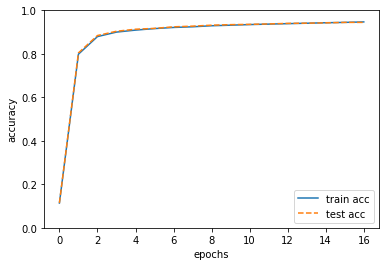

In [30]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
